<a href="https://colab.research.google.com/github/693080593/research/blob/master/Extractant_Solid_Loading_Time_Char_ER_Stratified_Test_Set_Multi_split_041821_%5B4%5D_XgBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv('/content/Extrantant Type Solid Loading Time Effect on Biocrude Yield HHV ER 041821 Stratified Test.csv')
Original_Oil_ER = data['Bio-crude Oil ER']
Original_Features = data.drop(['Bio-crude Oil Yield','Bio-crude Oil HHV','Bio-crude Oil ER'], axis = 1)

data_figure = data.drop(['Bio-crude Oil Yield','Bio-crude Oil HHV','Group'], axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data_figure.shape))
data_figure.shape

data_figure[:540:11]


Bio-crude dataset has 258 data points with 20 variables each.


,Solid Loading,Time,Dichloromethane,Toluene,Acetone,Tetrahydrofuran,Methanol,Hexane,Diethyl Ether,Chloroform,Ethyl Acetate,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Char Yield,Bio-crude Oil ER
0,40.566038,30.0,100,0,0,0,0,0,0,0,0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,92.000000
11,44.528302,5.0,100,0,0,0,0,0,0,0,0,14.000000,58.000000,0.000000,0.000000,22.000000,0.000000,6.000000,14.0000,101.167219
22,17.152659,30.0,100,0,0,0,0,0,0,0,0,2.870000,61.320000,5.240000,0.000000,21.690000,0.000000,11.760000,4.6100,72.615239
33,0.943396,5.0,0,0,0,100,0,0,0,0,0,0.000000,0.000000,41.330000,24.600000,0.000000,9.220000,0.000000,8.3300,59.125627
44,20.754717,10.0,100,0,0,0,0,0,0,0,0,35.520000,43.810000,0.000000,0.000000,15.700000,0.000000,4.500000,7.6000,58.250000
55,40.566038,30.0,0,0,100,0,0,0,0,0,0,15.780000,46.800000,0.000000,0.000000,16.100000,0.000000,7.420000,18.0000,59.310000
66,28.679245,31.6,100,0,0,0,0,0,0,0,0,9.400000,43.300000,0.000000,0.000000,42.500000,0.000000,4.800000,2.1000,55.900000
77,60.377358,0.0,0,0,0,0,0,0,0,100,0,1.100000,70.200000,0.000000,0.000000,19.300000,0.000000,7.700000,6.8000,49.847856
88,20.754717,10.0,100,0,0,0,0,0,0,0,0,0.000000,0.000000,52.870000,28.300000,0.000000,12.360000,0.760000,39.8700,47.584689
99,7.547170,8.0,100,0,0,0,0,0,0,0,0,7.400000,19.700000,0.000000,0.000000,58.900000,0.000000,7.000000,6.0450,55.524875


In [ ]:
# MinMaxScale
#from sklearn.preprocessing import MinMaxScaler
#from pandas import DataFrame

#data_MinMax = data2.drop(['Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash','Bio-crude Oil Yield','Group'], axis = 1)

#scaler = MinMaxScaler()

#print(scaler.fit(data_MinMax))

#print(scaler.data_max_)
#print(scaler.data_min_)

#data_MinMax3 = scaler.transform(data_MinMax)

#data_MinMax2 = pd.DataFrame(data = data_MinMax3*100,  columns =["Temperature"])

#print(data_MinMax2)

#Original_Features = pd.concat([data2['Lipid'],data2['Protein'],data2['Cellulose'],data2['Hemicellulose'],data2['Carbohydrate'],data2['Lignin'],data2['Ash'],data_MinMax2, data2['Group']], axis=1)

#data=pd.concat([Original_Features, data2['Bio-crude Oil Yield']], axis=1)

#data_figure_new=data.drop('Group', axis = 1)

#data[:517:11]

#Original_Features[:511:11]

In [2]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [ ]:
# No use.
for j in range(0,201,1):
  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=j)
  
  X_valid_new=X_valid.drop('Group', axis=1)

  Features_new=Features.drop('Group', axis=1)

  cnt = 1
  
  r2_train_all=[]
  r2_test_all=[]
  MRE_train_all=[]
  MRE_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(1,50,1):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    model = XGBRegressor(silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    
  # Predict validation set
  model.fit(Features_new, Oil_Yields)

  y_valid_predict = model.predict(X_valid_new)
  
  r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  MRE_valid = performance_metric(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("R2 score of valid set", r2_valid)
  print("Max Values of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Testmax-Valid:",max(r2_test_all)-r2_valid)
  print("Difference Values of R2 of training and test sets", np.mean(r2_train_all)-np.mean(r2_test_all))
  print("")
  #print("Mean value of MRE of training set", np.mean(MRE_train_all))
  #print("Mean value of MRE of test set", np.mean(MRE_test_all))
  #print("MRE of valid set:", MRE_valid)
  #print("Min Values of MRE of test set", min(MRE_test_all))
  #print("Standard deviation of MRE of test set", np.std(MRE_test_all))
  #print("Difference Values of MRE of training and test sets", np.mean(MRE_train_all)-np.mean(MRE_test_all))

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

group2 = Original_Features.loc[:,'Group']

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_HHV, y_valid = train_test_split(Original_Features, Original_Oil_HHV, test_size = 0.1, stratify=group2, random_state=62)

X_valid_new=X_valid.drop('Group', axis=1)

Features_new=Features.drop('Group', axis=1)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

for i in range(5000,6000,10):

  X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_HHV, shuffle=True, test_size = 0.2, random_state=i)

  model = XGBRegressor(silent = True)

  model.fit(X_train, y_train)
    
  y_train_predict = model.predict(X_train)
  y_test_predict = model.predict(X_test)

  MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
  MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
  y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
  y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
  r2_train = metrics.r2_score(y_train, y_train_predict)
  r2_test = metrics.r2_score(y_test, y_test_predict)

  MRE_train = performance_metric(y_train, y_train_predict)
  MRE_test = performance_metric(y_test, y_test_predict)

  cnt += 1
  MAE_train_all.append(MAE_train)
  MAE_test_all.append(MAE_test)
  y_train_rmse_all.append(y_train_rmse)
  y_test_rmse_all.append(y_test_rmse)
  r2_train_all.append(r2_train)
  r2_test_all.append(r2_test)
  MRE_train_all.append(MRE_train)
  MRE_test_all.append(MRE_test)

  # For drawing plot
  y_test_list.append(y_test.values)
  y_pred_list.append(y_test_predict)  

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
#print("Value of R2 of test set", r2_test_all)
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

print("")
# Predict validation set
model.fit(Features_new, Oil_HHV)

y_valid_predict = model.predict(X_valid_new)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("MAE of valid set:", MAE_valid)
print("RMSE of valid set:", y_valid_rmse)
print("R2 score of valid set", r2_valid)
print("MRE of valid set:", MRE_valid)

Mean value of MAE of training set 1.3174697348601656
Standard deviation of MAE of training set 0.054760328651761773
Mean value of MAE of test set 2.4793031500540463
Standard deviation of MAE of test set 0.2964377825773988

Mean value of RMSE of training set 1.7474706644340356
Standard deviation of RMSE of training set 0.08001800043240061
Mean value of RMSE of test set 3.4130593408604466
Standard deviation of RMSE of test set 0.45637633896059493

Mean value of R2 of training set 0.816112430092922
Standard deviation of R2 of training set 0.01753981863518191
Mean value of R2 of test set 0.27787894474272945
Standard deviation of R2 of test set 0.17396597391132596

Mean value of MRE of training set 0.03906443796632162
Standard deviation of MRE of training set 0.0016213932521828185
Mean value of MRE of test set 0.07350823143385118
Standard deviation of MRE of test set 0.008914877307128413

MAE of valid set: 2.9265060533142093
RMSE of valid set: 3.5300966697086276
R2 score of valid set 0.4647

Text(0.5, 1.0, 'y_pred vs. y_true')

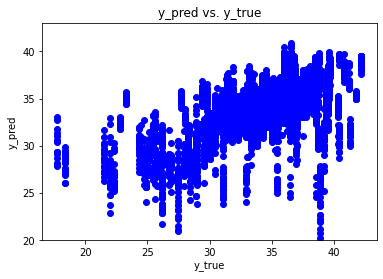

In [ ]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(20, 43)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_XGBoost.csv', index = False, header=True)

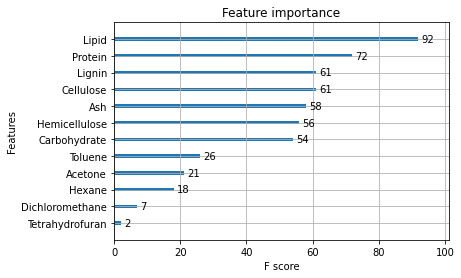

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

plot_importance(model)
plt.show()

Text(0.5, 1.0, 'y_pred vs. y_true')

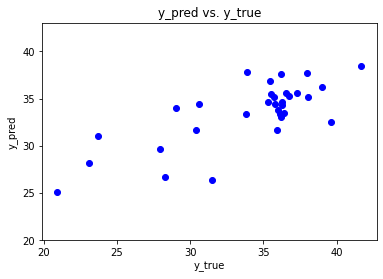

In [ ]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(20, 43)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
# n_estimators 参数的最佳取值(10, 200, 11)

for j in range(10, 200, 10):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': j, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# max_depth 参数的最佳取值(1, 20, 10)

for j in range(1, 20, 1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': j, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# min_child_weight 参数的最佳取值(1, 10, 10)

for j in range(0,11,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 4, 'min_child_weight': j,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# gamma 参数的最佳取值(0, 0.2, 11)

for j in range(0,21,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': j/100, 'max_depth': 4, 'min_child_weight': 4,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# subsample 参数的最佳取值(0, 1, 11)

for j in range(5990,6010,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 4,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': j/10000, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j/10000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# colsample_bytree 参数的最佳取值(0, 1, 11)

for j in range(0,11,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 4,
                'colsample_bytree': j/10, 'colsample_bylevel': 1, 'subsample': 0.6002, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j/10)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# reg_lambda 参数的最佳取值(0, 1, 11)

for j in range(9680,9700,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 4,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6002, 'reg_lambda': j/10000, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j/10000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# reg_alpha 参数的最佳取值(0, 1, 11)

for j in range(0,11,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 4,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6002, 'reg_lambda': 0.9693, 'reg_alpha': j/10,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j/10)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# eta 参数的最佳取值(-2, 0, 10)

for j in range(0,10,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': j/100, 'n_estimators': 50, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 4,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6002, 'reg_lambda': 0.9693, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [ ]:
# seed 参数的最佳取值(0, 100, 1)

for j in range(0,99,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor

  from sklearn.model_selection import train_test_split
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  group2 = Original_Features.loc[:,'Group']

  # TODO: Shuffle and split the data into training and testing subsets
  Features, X_valid, Oil_Yields, y_valid = train_test_split(Original_Features, Original_Oil_Yields, test_size = 0.1, stratify=group2, random_state=62)
  
  X_valid_new=X_valid.drop('Group', axis=1)
  
  Features_new=Features.drop('Group', axis=1)
  
  cnt = 1

  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  
  for i in range(5000,6000,10):
    
    X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_Yields, shuffle=True, test_size = 0.2, random_state=i)

    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 4,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6002, 'reg_lambda': 0.9693, 'reg_alpha': 0,
                'seed': j}

    model = XGBRegressor(**other_params,silent = True)

    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    
    cnt += 1
    
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test) 
    
  # Predict validation set
  #model.fit(Features_new, Oil_Yields)
  #y_valid_predict = model.predict(X_valid_new)
  
  #r2_valid = metrics.r2_score(y_valid, y_valid_predict)

  print(j)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  #print("R2 score of valid set", r2_valid)
  #print("Max value of R2 of test set", max(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))
  print("Train-Test:",np.mean(r2_train_all)-np.mean(r2_test_all))
  #print("Testmax-Valid:",max(r2_test_all)-r2_valid)

In [3]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

group2 = Original_Features.loc[:,'Group']

# TODO: Shuffle and split the data into training and testing subsets
Features, X_valid, Oil_ER, y_valid = train_test_split(Original_Features, Original_Oil_ER, test_size = 0.1, stratify=group2, random_state=62)

X_valid_new=X_valid.drop('Group', axis=1)

Features_new=Features.drop('Group', axis=1)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

for i in range(5000,6000,10):

  X_train, X_test, y_train, y_test = train_test_split(Features_new, Oil_ER, shuffle=True, test_size = 0.2, random_state=i)

  #other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 4, 'min_child_weight': 4,
  #              'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6002, 'reg_lambda': 0.9693, 'reg_alpha': 0,
  #              'seed': 33}

  #model = XGBRegressor(**other_params,silent = True)

  model = XGBRegressor(silent = True)

  model.fit(X_train, y_train)
    
  y_train_predict = model.predict(X_train)
  y_test_predict = model.predict(X_test)

  MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
  MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
  y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
  y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
  r2_train = metrics.r2_score(y_train, y_train_predict)
  r2_test = metrics.r2_score(y_test, y_test_predict)

  MRE_train = performance_metric(y_train, y_train_predict)
  MRE_test = performance_metric(y_test, y_test_predict)

  cnt += 1
  MAE_train_all.append(MAE_train)
  MAE_test_all.append(MAE_test)
  y_train_rmse_all.append(y_train_rmse)
  y_test_rmse_all.append(y_test_rmse)
  r2_train_all.append(r2_train)
  r2_test_all.append(r2_test)
  MRE_train_all.append(MRE_train)
  MRE_test_all.append(MRE_test)

  # For drawing plot
  y_test_list.append(y_test.values)
  y_pred_list.append(y_test_predict)  

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
#print("Value of R2 of test set", r2_test_all)
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

print("")
# Predict validation set
model.fit(Features_new, Oil_ER)

y_valid_predict = model.predict(X_valid_new)

MAE_valid = metrics.mean_absolute_error(y_valid, y_valid_predict)
y_valid_rmse = sqrt(metrics.mean_squared_error(y_valid, y_valid_predict))
r2_valid = metrics.r2_score(y_valid, y_valid_predict)
MRE_valid = performance_metric(y_valid, y_valid_predict)

print("MAE of valid set:", MAE_valid)
print("RMSE of valid set:", y_valid_rmse)
print("R2 score of valid set", r2_valid)
print("MRE of valid set:", MRE_valid)

Mean value of MAE of training set 3.6992195757596873
Standard deviation of MAE of training set 0.18094369486274448
Mean value of MAE of test set 10.282097462819552
Standard deviation of MAE of test set 1.1036656082677931

Mean value of RMSE of training set 4.976499244750456
Standard deviation of RMSE of training set 0.25927975179388313
Mean value of RMSE of test set 13.571382735544411
Standard deviation of RMSE of test set 1.3888199474319762

Mean value of R2 of training set 0.9270882744666915
Standard deviation of R2 of training set 0.007145892403611989
Mean value of R2 of test set 0.41792185329315046
Standard deviation of R2 of test set 0.1194357160672545

Mean value of MRE of training set 0.07182939700494867
Standard deviation of MRE of training set 0.0035744654111236293
Mean value of MRE of test set 0.19962573071101183
Standard deviation of MRE of test set 0.023086820198590822

MAE of valid set: 8.554940597151067
RMSE of valid set: 12.078986639033275
R2 score of valid set 0.5714300

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_XGBoost_opt.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

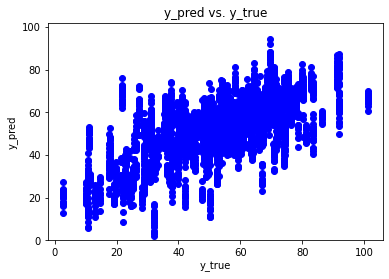

In [ ]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 102)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

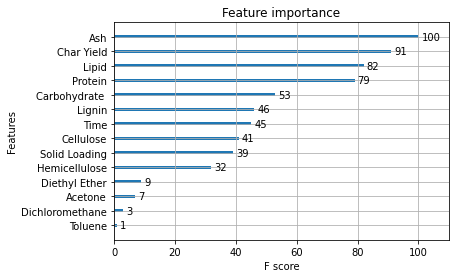

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

plot_importance(model)
plt.show()

Text(0.5, 1.0, 'y_pred vs. y_true')

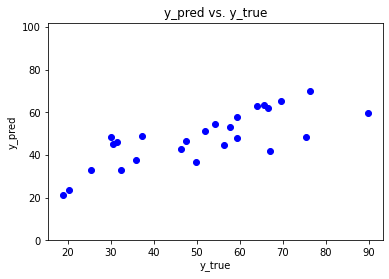

In [ ]:
import matplotlib.pyplot as py
py.plot(y_valid, y_valid_predict, 'bo')
py.ylim(0, 102)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')